# Lab5 层次聚类
- 姓名：彭钰钊
- 学号：2110756
- 专业：计算机科学与技术
- GitHub链接：https://github.com/Yuzhao-P/Machine-Learning
    > 上传历次实验数据文件和.ipynb文件，同时在README.md中更新有关实验的相关知识整理。
## 实验要求

### 基本要求
绘制聚类前后样本分布情况
1. 实现 single-linkage 层次聚类算法；
2. 实现 complete-linkage 层次聚类算法。

### 中级要求
实现 average-linkage 层次聚类算法，绘制样本分布图。

### 高级要求
对⽐上述三种算法，给出结论。

### 拓展要求
通过变换聚类簇的个数，测试上述三种算法的性能，并给出分析。

***截止日期：12月1日***

- 以学号+姓名(5)的命名形式打包实验代码+实验报告发送到邮箱2120230658@mail.nankai.edu.cn
- 推荐使用.ipynb文件格式

### 导入所需要的包

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score, silhouette_score
from sklearn.datasets._samples_generator import make_blobs
MAX_NUM = 1e3

### 导入数据集
数据来源：文件`data.dat`  
标签来源：文件`label.dat`

In [2]:
data_set = pd.read_csv('data.dat', header=None, sep=' ')
label_set = pd.read_csv('label.dat', header=None, sep=' ')

In [3]:
data_set

0         1         2
0     2.080957  5.841362  4.929697
1     0.296014  3.175925  4.145915
2     2.164914  6.197920  7.737439
3     1.457204  1.224453  0.702150
4     2.061224  4.739729  7.969272
...        ...       ...       ...
1995  2.839672  6.247741  4.668259
1996  2.751517  5.154804  5.689927
1997  2.190572  6.136170  6.770182
1998  1.123277  3.106084  2.598650
1999  0.261586  0.697779  0.469163

[2000 rows x 3 columns]

In [4]:
label_set

0
0     2.0
1     1.0
2     3.0
3     0.0
4     3.0
...   ...
1995  2.0
1996  2.0
1997  3.0
1998  1.0
1999  0.0

[2000 rows x 1 columns]

In [5]:
# 可视化数据集——散点图
def plot_dataset(*data):
    X,labels_true =data
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors='rgbyckm' # 每个簇的样本标记不同的颜色
    markers='o^sP*DX'
    for i in range(len(labels_true)):
        predict=labels_true[i]
        ax.scatter(X[i,0],X[i,1],label="cluster %d"%labels_true[i],
        color=colors[int(predict%len(colors))],marker=markers[int(labels_true[i]%len(markers))],alpha=0.5)
    plt.show()

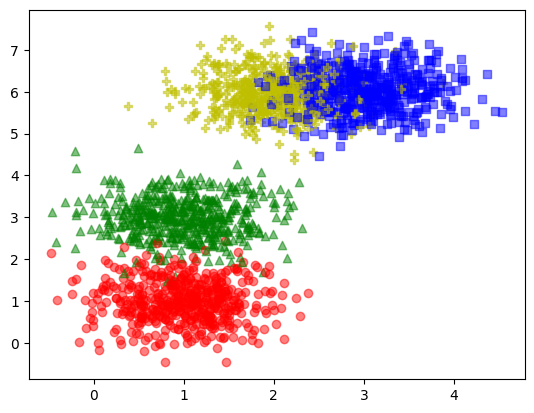

In [6]:
plot_dataset(np.array(data_set), np.array(label_set))

## 基本要求 + 中级要求
我们本次实验采用Agglomerative Clutsering层次聚类方法，即自底向上的聚合聚类方法：  
采⽤⾃底向上的策略，开始将每个样本各⾃分到⼀个类；之后将相距最近的两类合并，建⽴⼀个新的类，重复操作直到满⾜停⽌条件；得到层次化的类别。

**算法描述**  
输入——n 个样本组成的样本集合及样本之间的距离  
输出——对样本集合的⼀个层次化聚类  
- 计算 n 个样本两两之间的欧式距离$\{d_{ij}\}$，记作矩阵$D=[d_{ij}]_{n\times n}$
- 构造 n 个类，每个类只包含⼀个样本
- 合并类间距离最⼩的两个类，其中最短距离为类间距离，构建⼀个新类
- 计算新类与当前各类的距离。若类的个数为1，终⽌计算，否则回到步骤3

**类间距定义**  
类$G_p$与类$G_q$之间的距离$D(p,q)$，也称为连接，设类$G_p包含$n_p$个样本，类$G_q$包含$n_q$个样本，连接有以下定义:
1. single-linkage 层次聚类算法——最短距离/单连接$$D_{pq}=\min\{d_{ij}|x_i\in G_p,x_j\in G_q\}$$
2. complete-linkage 层次聚类算法——最长距离/全连接$$D_{pq}=\max\{d_{ij}|x_i\in G_p,x_j\in G_q\}$$
3. average-linkage 层次聚类算法——平均距离$$D_{pq}=\frac{1}{n_pn_q}\sum\limits_{x_i\in G_p}\sum\limits_{x_j\in G_q}d_{ij}$$

### single-linkage层次聚类算法

In [7]:
# single-linkage实现
def single_linkage(X, setList=None, allDist=None, dest=None, src=None):
    return np.min(X, axis=0)

### complete-linkage层次聚类算法

In [8]:
# complete-linkage实现
def complete_linkage(X, setList=None, allDist=None, dest=None, src=None):
    return np.max(X, axis=0)

### average-linkage层次聚类算法

In [9]:
# average-linkage实现
def average_linkage(X, setList, allDist, dest, src):
    dest_points = setList[dest]
    src_points = setList[src]
    Gp_points = dest_points + src_points
    res=[]
    # 遍历当前的每个类
    for i in range(X.shape[1]):
        Gq_points = setList[i]  # 得到每个类的点
        # 计算两个类 G_p 和 G_q 之间，任意两个样本之间距离的平均值
        disSum = 0
        for m in Gp_points:
            for n in Gq_points:
                disSum += allDist[m][n]
        res.append(disSum / (len(Gp_points) * len(Gq_points)))
    return res

### 实现聚合层次聚类

In [10]:
class AgglomerativeClustering:
    def __init__(self):
        # 对每次的合并进行记录
        self.steps=[]

    def fit(self,datas,method):
        self.dataCnt = datas.shape[0]  # 获取数据点的数目
        # 预处理各点之间的距离
        allDist = np.zeros((self.dataCnt,self.dataCnt))  # 创建一个零矩阵，用于存放点间距离
        for i in range(self.dataCnt):
            for j in range(i):  # 双重循环，任意两点之间距离只计算一次——我们选用欧氏距离：这里是欧氏距离的平方
                allDist[i][j] = allDist[j][i] = np.sum((datas[i]-datas[j])**2)
        # 初始化聚类集合列表 setList，每个元素是一个包含一个数据点的列表，初始化 clusterCount 
        setList, clusterCount = [[i] for i in range(self.dataCnt)], self.dataCnt
        print("点间距离计算完毕!")

        # 聚类间距离矩阵
        clusterDist = np.zeros((self.dataCnt,self.dataCnt)) + MAX_NUM  # 创建一个簇间距离矩阵，初始值为一个较大的数值 MAX_NUM
        for i in range(clusterCount):
            for j in range(i + 1, clusterCount):
                clusterDist[i][j] = clusterDist[j][i] = allDist[i][j]
        print("类间距离计算完毕!")

        # 遍历聚类
        while clusterCount != 1:
            # 最相似的两个聚类
            res = np.argmin(clusterDist)
            # 从一维索引还原到二维矩阵的坐标
            dest,src = int(res/clusterCount),res%clusterCount
            # steps进行一次记录
            self.steps.append((setList[dest][0],setList[src][0]))
            # 聚类间距离矩阵更新
            modify = method(clusterDist[[dest,src]], setList, allDist, dest, src)
            clusterDist[dest] = modify
            clusterDist[:,dest] = modify
            clusterDist = np.delete(clusterDist,src,axis=0)
            clusterDist = np.delete(clusterDist,src,axis=1)
            clusterDist[dest][dest] = MAX_NUM
            # 聚类更新
            setList[dest] = setList[dest] + setList[src]
            del setList[src]
            clusterCount -= 1
        print("聚类完毕!")

    # 函数返回了一个列表 cluster，其中存储了每个数据点所属的聚类标签
    def label(self,k):
        root = list(range(self.dataCnt))
        def find_root(n):
            if root[root[n]] == root[n]:
                return root[n]
            root[n]=find_root(root[n])
            return root[n]
        for i in range(self.dataCnt-k): # 根据steps记录产生非连通图
            src,dest = self.steps[i]
            root[find_root(dest)] = find_root(src)
        cluster, clusterNum = [0 for i in range(self.dataCnt)], 0
        for i in range(self.dataCnt): # 将根节点标注为新的cluster
            if i == root[i]: # i是根
                clusterNum += 1
                cluster[i] = clusterNum
        for i in range(self.dataCnt): # 将非根节点标注为根节点的cluster
            if i != root[i]: # i不是根
                cluster[i] = cluster[find_root(i)]
        return cluster

### 绘制聚类图像
我们通过形状来区分聚类前的不同类簇，通过颜色来区分聚类后的不同类簇

In [11]:
def plot_data(*data):
    '''
    绘制用于聚类的数据集
    :param data: 可变参数。它是一个元组。元组元素依次为：第一个元素为样本集，第二个元素为样本集的真实簇分类标记，第三个元素为预测分类标记
    :return: None
    '''
    X,labels_true,labels_predict,name =data
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors='rgbyckm' # 每个簇的样本标记不同的颜色
    markers='o^sP*DX'
    for i in range(len(labels_true)):
        predict=labels_predict[i]
        ax.scatter(X[i,0],X[i,1],label="cluster %d"%labels_true[i],
        color=colors[int(predict%len(colors))],marker=markers[int(labels_true[i]%len(markers))],alpha=0.5)
    plt.title(name)
    plt.show()

In [12]:
def plot_3D(*data):
    X,labels_true,labels_predict,name =data
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors='rgbyckm' # 每个簇的样本标记不同的颜色
    markers='o^sP*DX'
    for i in range(len(labels_true)):
        predict=labels_predict[i]
        ax.scatter(X[i,0],X[i,1],X[i,2], color=colors[int(predict%len(colors))],marker=markers[int(labels_true[i]%len(markers))], s=np.pi, alpha=0.5)
    plt.title(name)
    plt.show()

点间距离计算完毕!
类间距离计算完毕!
聚类完毕!


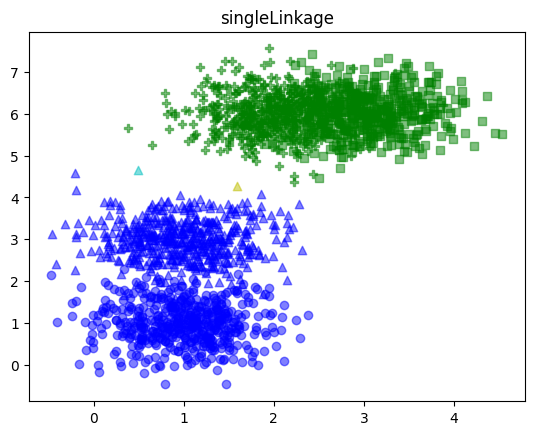

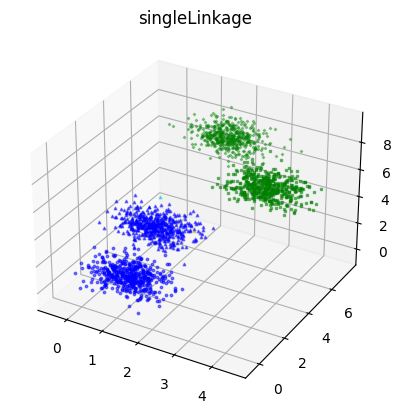

--------------------Segmentation--------------------
点间距离计算完毕!
类间距离计算完毕!
聚类完毕!


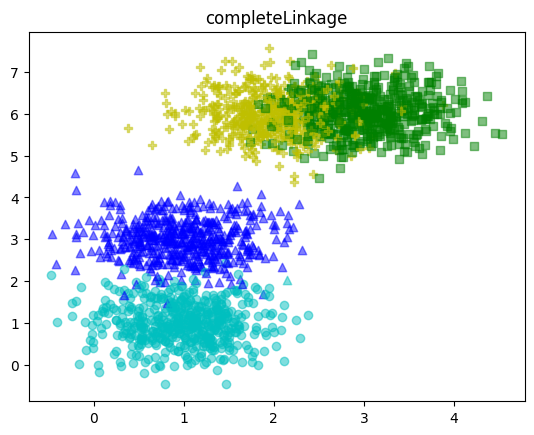

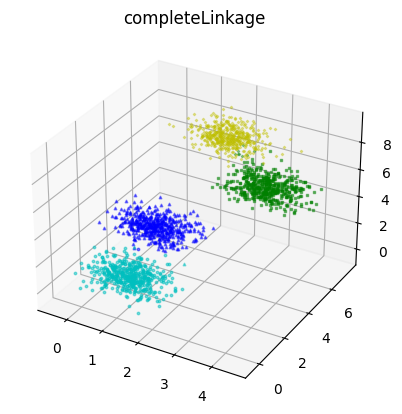

--------------------Segmentation--------------------
点间距离计算完毕!
类间距离计算完毕!
聚类完毕!


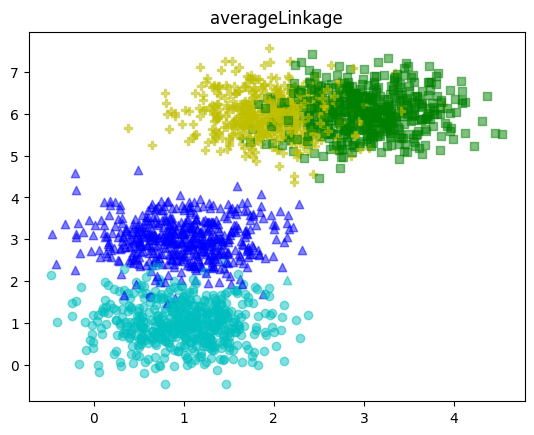

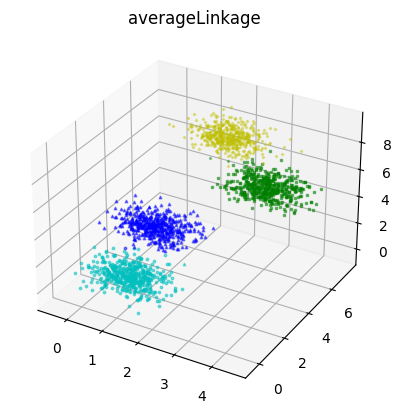

--------------------Segmentation--------------------


In [13]:
title = ['singleLinkage','completeLinkage','averageLinkage']
METHOD_APPLY = [single_linkage,complete_linkage,average_linkage]
k=4
pre_label=[]  # 保存预测类别
for i, method in enumerate(METHOD_APPLY):
    model = AgglomerativeClustering()
    model.fit(np.array(data_set),method)
    plot_data(np.array(data_set),np.array(label_set),model.label(k),title[i])
    pre_label.append(model.label(k))
    plot_3D(np.array(data_set),np.array(label_set),model.label(k),title[i])
    print("--------------------Segmentation--------------------")

## 高级要求
> https://zhuanlan.zhihu.com/p/609722957  
> https://zhuanlan.zhihu.com/p/401173177  
> https://blog.csdn.net/kfnorthwind/article/details/109362011
### Adjusted Rand Index(调整兰德系数)
一种用于衡量聚类算法性能的指标，它是Rand Index的一种调整形式，可以用于评估将样本点分为多个簇的聚类算法。它考虑了机会的概率，取值范围为，其中值越接近1表示聚类结果越准确，值越接近0表示聚类结果与随机结果相当，值越接近-1表示聚类结果与真实类别完全相反。

- sklearn库函数：sklearn.metrics.adjusted_rand_score(labels_true, labels_pred)

### Adjusted Mutual Information Score(调整互信息分数)
一种用于衡量聚类算法性能的指标，它是基于互信息的分数的一种调整形式，AMI不受标签数值的影响，即使标签重新排序，也会产生相同的分数。AMI越大相似度越高，AMI接近于0表示簇向量是随机分配的。

- sklearn库函数：sklearn.metrics.adjusted_mutual_info_score(labels_true, labels_pred)

### Fowlkes-Mallows Index(F值)
对聚类结果和真实值计算得到的召回率和精确率，进行几何平均的结果，取值范围为 [0,1]，越接近1越好。

- sklearn库函数：sklearn.metrics.fowlkes_mallows_score(labels_true, labels_pred)

### Silhouette Coefficient(轮廓系数)
轮廓系数S的取值范围为[-1, 1]，轮廓系数越大聚类效果越好。

- sklearn库函数：sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)


In [14]:
print("【外部指标】ARI") 
for i ,label in enumerate(pre_label):
    print("{}：{}".format(title[i], adjusted_rand_score(np.array(label_set).flatten(), label)))
print("--------------------Segmentation--------------------")
print("【外部指标】AMI") 
for i ,label in enumerate(pre_label):
    print("{}：{}".format(title[i], adjusted_mutual_info_score(np.array(label_set).flatten(), label)))
print("--------------------Segmentation--------------------")
print("【外部指标】F值") 
for i ,label in enumerate(pre_label):
    print("{}：{}".format(title[i], fowlkes_mallows_score(np.array(label_set).flatten(), label)))
print("--------------------Segmentation--------------------")
print("【内部指标】轮廓系数") 
for i ,label in enumerate(pre_label):
    print("{}：{}".format(title[i], silhouette_score(np.array(data_set), label, sample_size=len(data_set))))

【外部指标】ARI
singleLinkage：0.4991262838267789
completeLinkage：0.9854094030308562
averageLinkage：0.9933406949431007
--------------------Segmentation--------------------
【外部指标】AMI
singleLinkage：0.6641184138130835
completeLinkage：0.9778416913756555
averageLinkage：0.9879712620277059
--------------------Segmentation--------------------
【外部指标】F值
singleLinkage：0.7060467424353057
completeLinkage：0.9890518173600145
averageLinkage：0.995003031059426
--------------------Segmentation--------------------
【内部指标】轮廓系数
singleLinkage：0.277475441702113
completeLinkage：0.6308278499794413
averageLinkage：0.6331791037769805


我们设置聚类簇个数为4，通过我们输出的样本分布图像以及聚类评价指标对⽐上述三种算法：
#### 分析图像
我们的样本分布图像中，不同的标记形状表示不同的真实类簇，不同的颜色表示不同的聚类簇，可以清楚的看见single_linkage算法的准确率较低，明显不如complete_linkage算法和average_linkage算法，相较于后两种算法【成功区分出4个聚类簇】而言single_linkage算法只分出了部分聚类簇，并存在将不同类没有分开的问题。这是由于其中个别的点距离比较近就被合并了，导致未能很好的实现聚类效果。
#### 综合分析
- single_linkage算法对噪声和异常值敏感，容易受到局部最小值的影响，也容易形成长条形的聚类，不太适用于球状聚类；而对于我们本次实验数据而言，很显然更偏向于球状聚类，因此使用single_linkage算法的效果不好就是在意料之中的了。
- complete_linkage算法对于对异常值相对较不敏感，即离群点处理能力不足，会导致即使两个聚类已经很接近了，但是存在异常值，就不会合并。以上两种算法的共同问题就是指考虑了某个有特点的数据，而没有考虑类内数据的整体特点。
- average_linkage算法介于single_linkage算法和complete_linkage算法之间，对异常值的影响相对较小，在某些情况下能够形成均匀的聚类。这种方法就是把两个集合中的点两两的距离全部放在一起求一个平均值，考虑了整体情况，不会因为某些极端值或边界上的点影响整体结果。

## 拓展要求
根据我们的要求，我们需要改变聚类簇的个数，即k值来重新测试上述三种算法的性能，观察我们的数据集中标签文件`label.dat`，发现这个文件里的类别只有4个。【Emmm...】  
那么，首先我们重新生成数据，设置k值分别为2、4、6、8。
- 参考：https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [15]:
def create_data(centers,num=100,std=0.7):
    '''
    生成用于聚类的数据集
    :param centers: 聚类的中心点组成的数组。如果中心点是二维的，则产生的每个样本都是二维的。
    :param num: 样本数
    :param std: 每个簇中样本的标准差
    :return: 用于聚类的数据集。是一个元组，第一个元素为样本集，第二个元素为样本集的真实簇分类标记
    '''
    X, labels_true = make_blobs(n_samples=num, centers=centers, cluster_std=std)
    return  X, labels_true

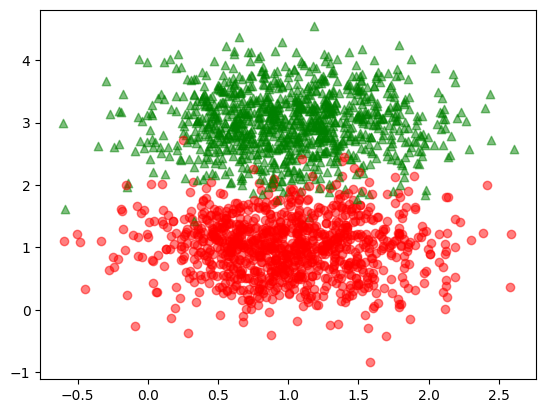

点间距离计算完毕!
类间距离计算完毕!
聚类完毕!
ARI-singleLinkage：0.0
AMI-singleLinkage：1.3989120980073463e-15
F值-singleLinkage：0.7065763405765376
轮廓系数-singleLinkage：0.06838617177531392


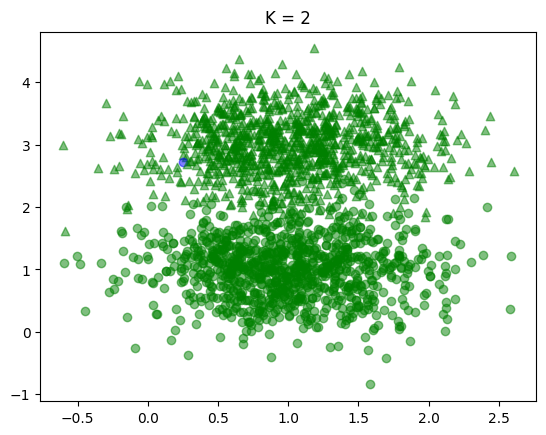

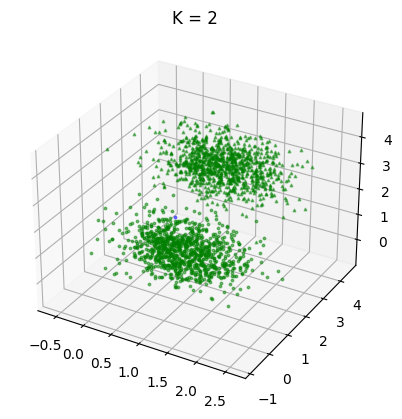

-------Segmentation-------


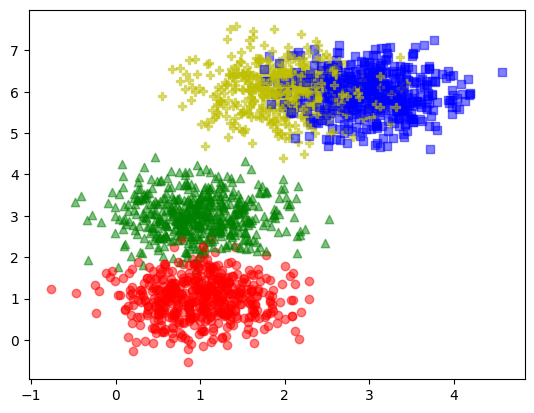

点间距离计算完毕!
类间距离计算完毕!
聚类完毕!
ARI-singleLinkage：0.4991242803198932
AMI-singleLinkage：0.6641174517680632
F值-singleLinkage：0.7060453246793035
轮廓系数-singleLinkage：0.21573409806567628


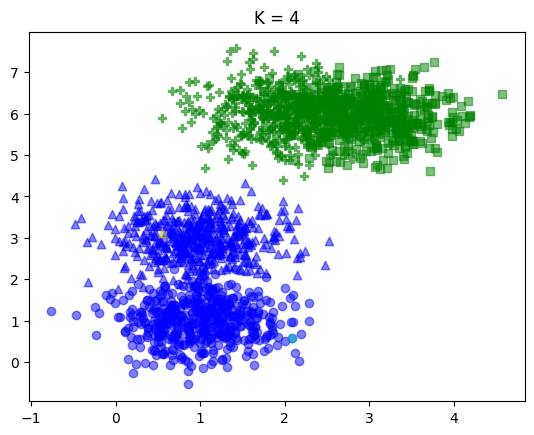

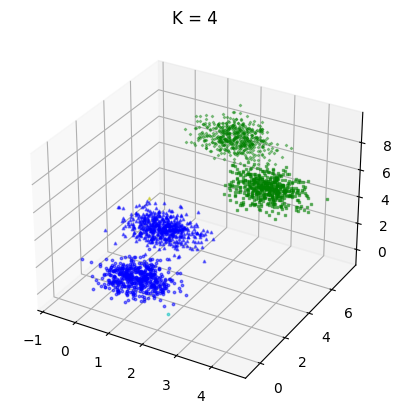

-------Segmentation-------


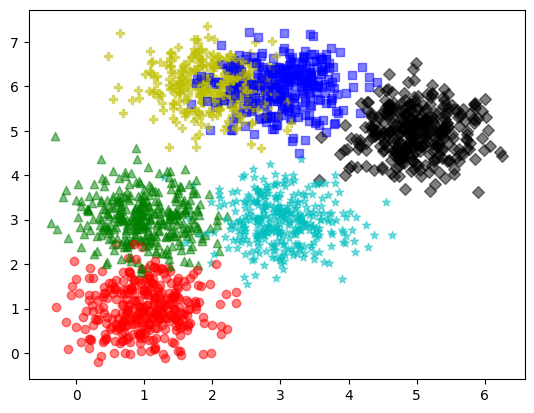

点间距离计算完毕!
类间距离计算完毕!
聚类完毕!
ARI-singleLinkage：-7.909972796264704e-07
AMI-singleLinkage：0.0006370623041035592
F值-singleLinkage：0.4065135897469792
轮廓系数-singleLinkage：-0.2922645894682068


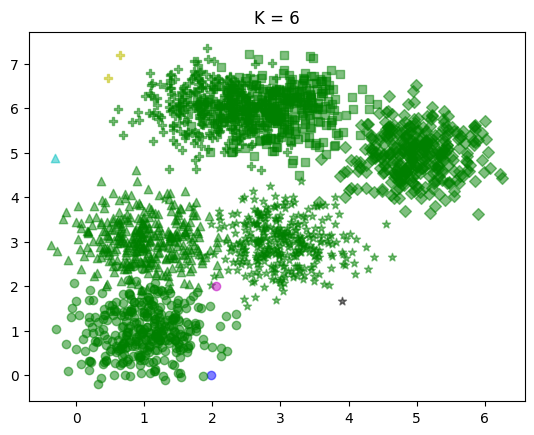

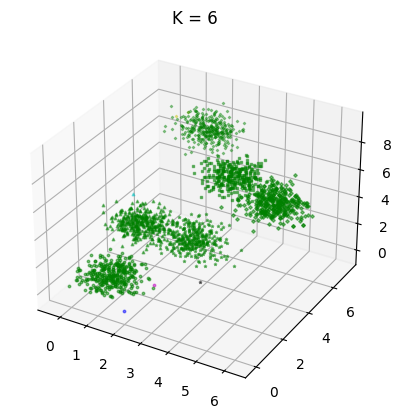

-------Segmentation-------


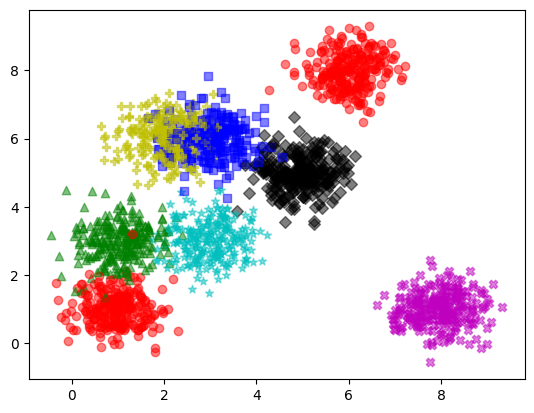

点间距离计算完毕!
类间距离计算完毕!
聚类完毕!
ARI-singleLinkage：0.1770581535766905
AMI-singleLinkage：0.5180612945251107
F值-singleLinkage：0.45677720315187537
轮廓系数-singleLinkage：-0.20670947374554777


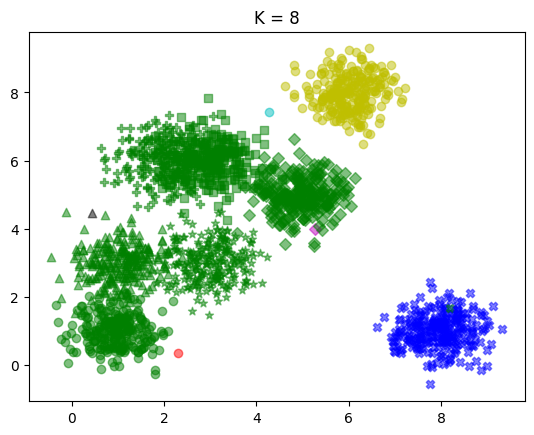

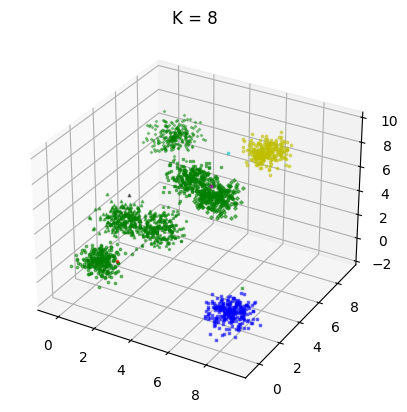

-------Segmentation-------


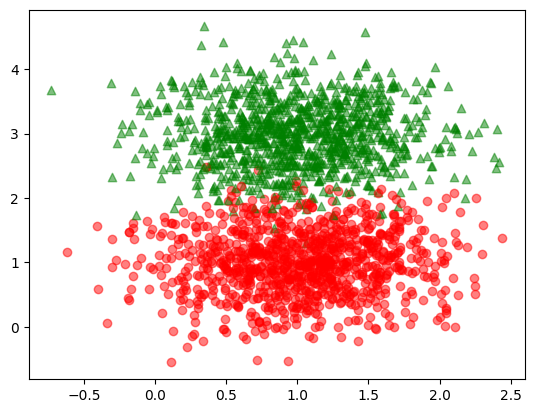

点间距离计算完毕!
类间距离计算完毕!
聚类完毕!
ARI-completeLinkage：0.8629727976747382
AMI-completeLinkage：0.8129502146069149
F值-completeLinkage：0.9316274153042946
轮廓系数-completeLinkage：0.576347201807712


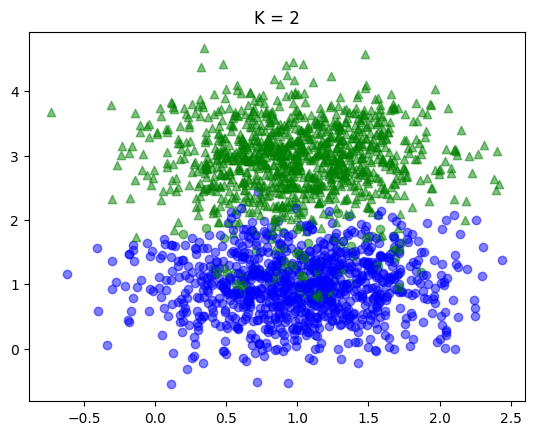

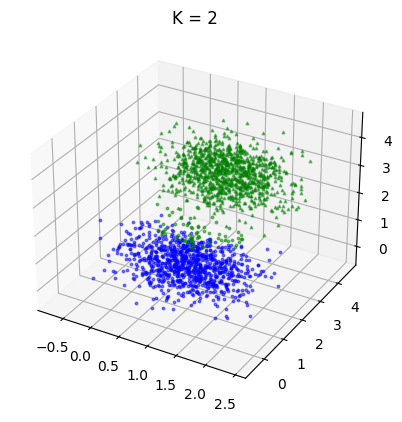

-------Segmentation-------


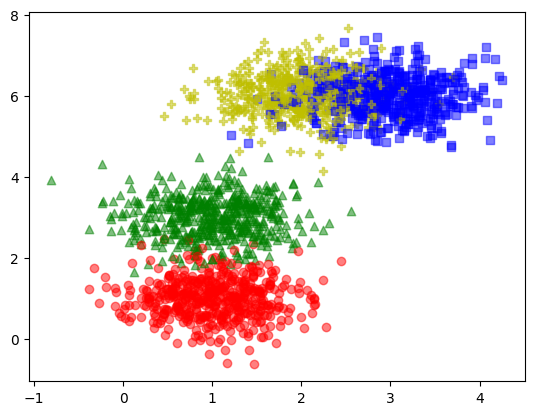

点间距离计算完毕!
类间距离计算完毕!
聚类完毕!
ARI-completeLinkage：0.9319183757797211
AMI-completeLinkage：0.9370457738170085
F值-completeLinkage：0.9489667773070908
轮廓系数-completeLinkage：0.5949561257804931


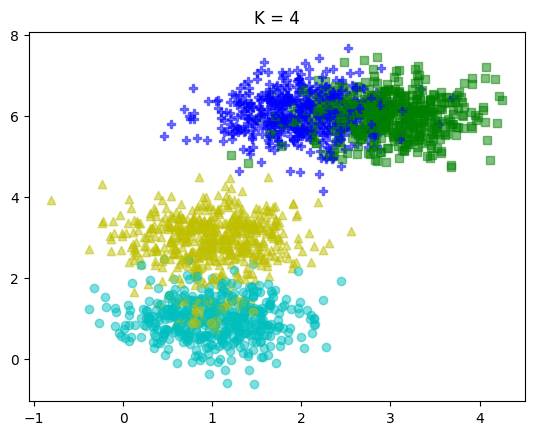

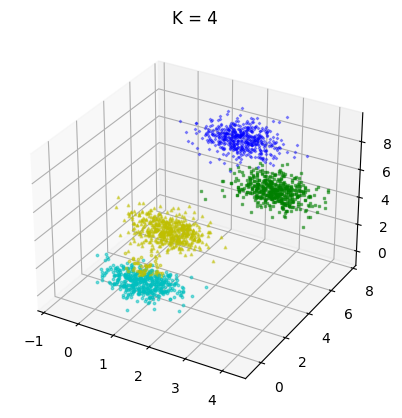

-------Segmentation-------


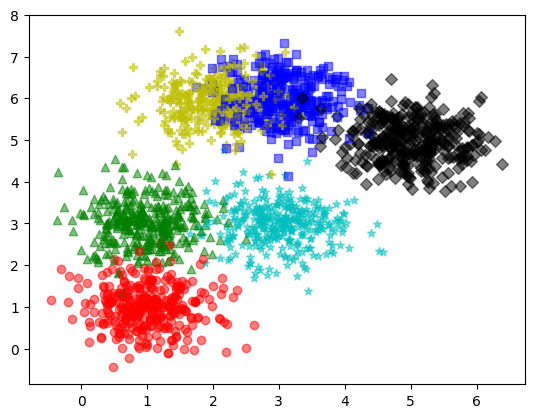

点间距离计算完毕!
类间距离计算完毕!
聚类完毕!
ARI-completeLinkage：0.9513386781818969
AMI-completeLinkage：0.9478677354294847
F值-completeLinkage：0.9594299559806067
轮廓系数-completeLinkage：0.5354284897163455


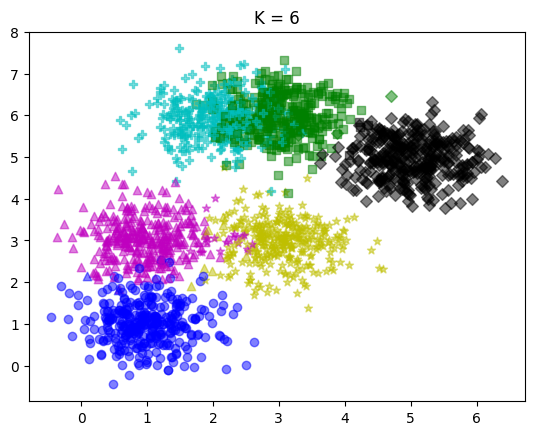

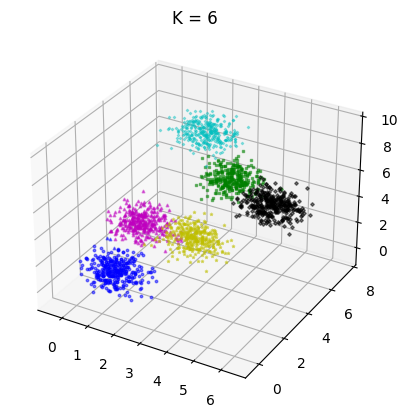

-------Segmentation-------


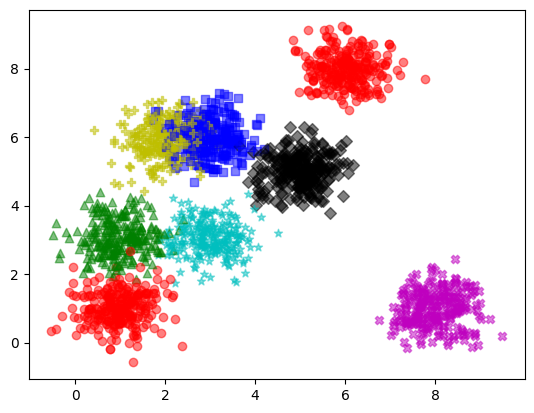

点间距离计算完毕!
类间距离计算完毕!
聚类完毕!
ARI-completeLinkage：0.9655142213662443
AMI-completeLinkage：0.9662160088026445
F值-completeLinkage：0.9698106316568783
轮廓系数-completeLinkage：0.5996637711737833


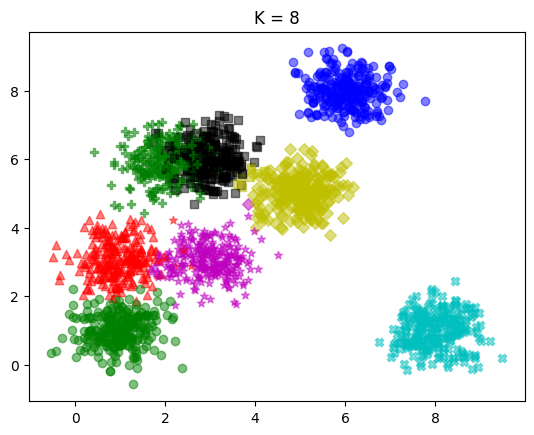

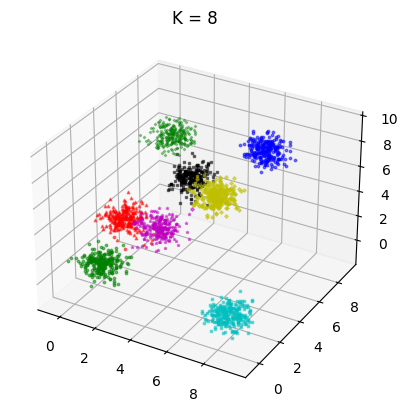

-------Segmentation-------


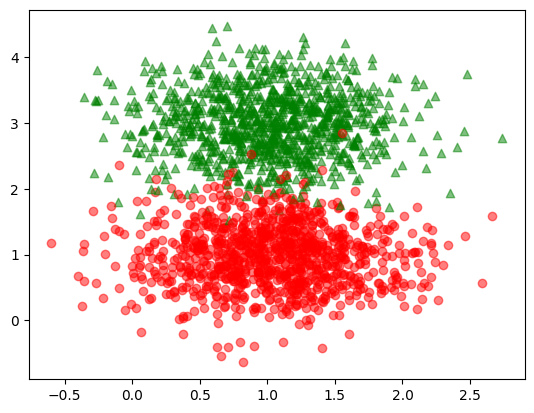

点间距离计算完毕!
类间距离计算完毕!
聚类完毕!
ARI-averageLinkage：0.9900200075524624
AMI-averageLinkage：0.9754727623125427
F值-averageLinkage：0.9950075300062057
轮廓系数-averageLinkage：0.6180191064477741


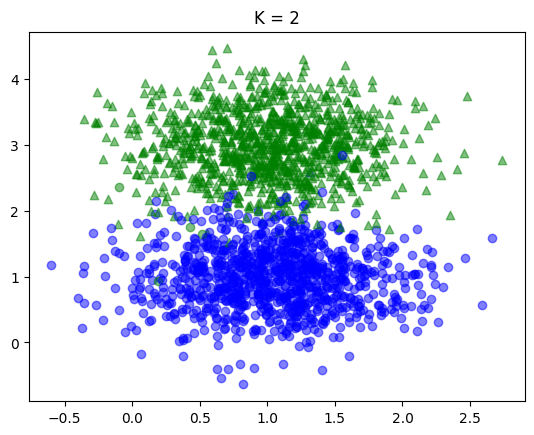

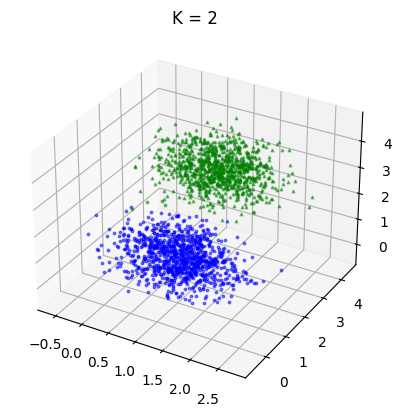

-------Segmentation-------


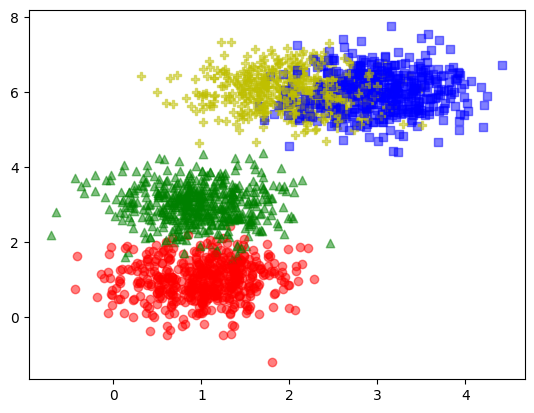

点间距离计算完毕!
类间距离计算完毕!
聚类完毕!
ARI-averageLinkage：0.9906913945154111
AMI-averageLinkage：0.9839520917512555
F值-averageLinkage：0.9930150650672466
轮廓系数-averageLinkage：0.6257865513845691


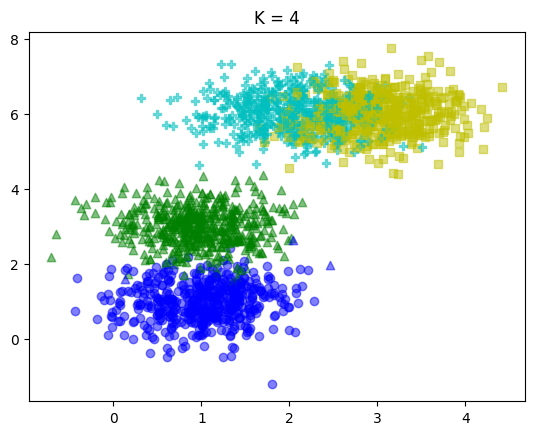

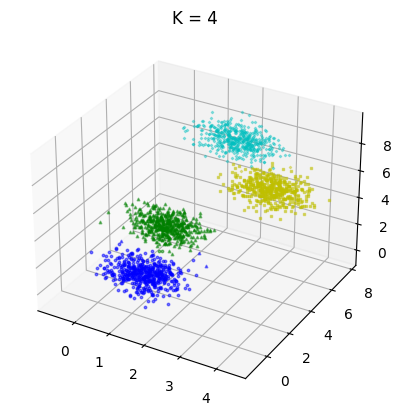

-------Segmentation-------


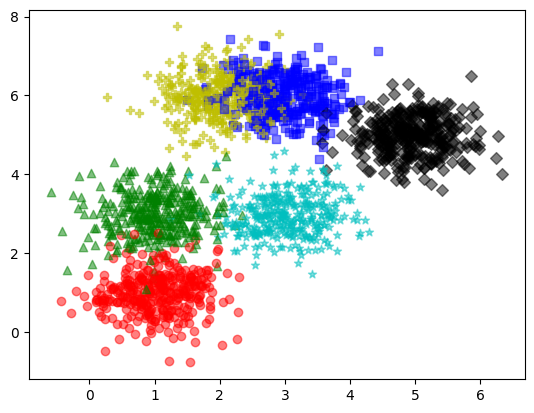

点间距离计算完毕!
类间距离计算完毕!
聚类完毕!
ARI-averageLinkage：0.9462088586424316
AMI-averageLinkage：0.9398989770963886
F值-averageLinkage：0.9551581424528373
轮廓系数-averageLinkage：0.5420003155458739


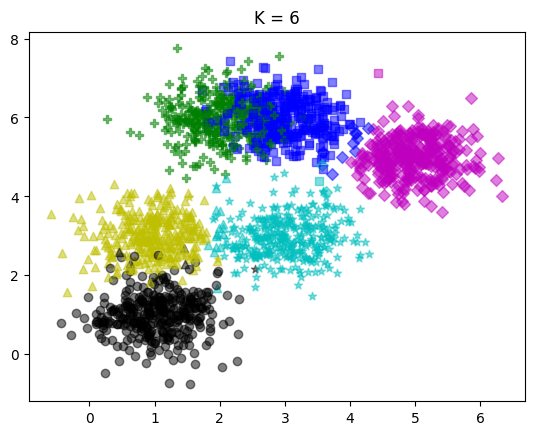

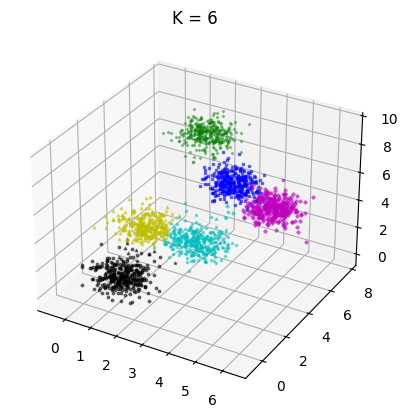

-------Segmentation-------


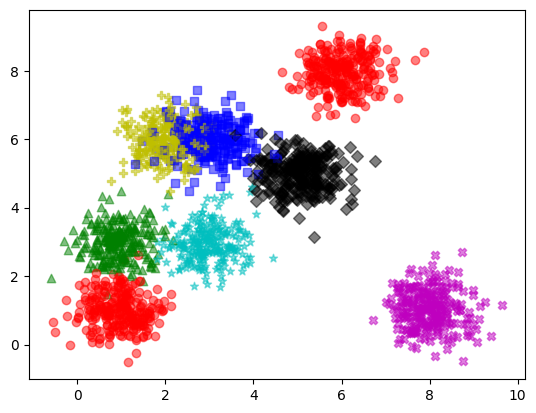

点间距离计算完毕!
类间距离计算完毕!
聚类完毕!
ARI-averageLinkage：0.9686288972707134
AMI-averageLinkage：0.9684555130564726
F值-averageLinkage：0.9725376564941446
轮廓系数-averageLinkage：0.6037576023209689


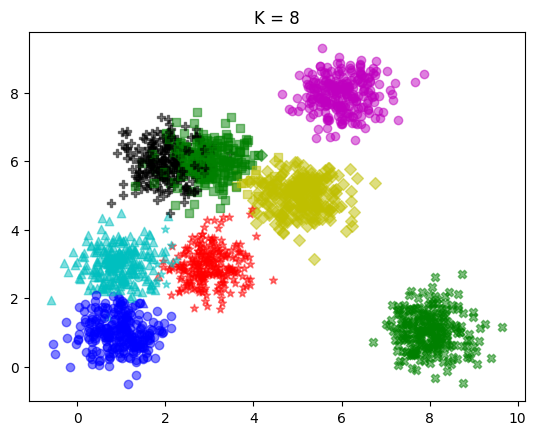

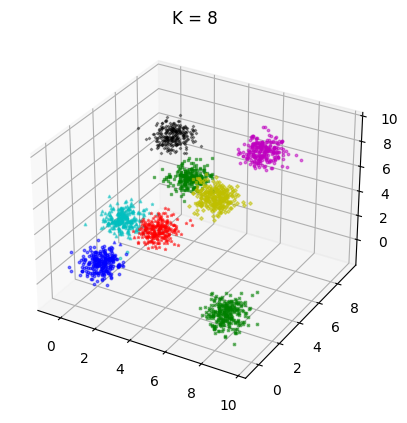

-------Segmentation-------


In [16]:
centers_lst=[[1,1,1],[1,3,3],[3,6,5],[2,6,8],[3,3,3],[5,5,5],[8,1,0],[6,8,7]]
adjusted_rand_scores = []
adjusted_mutual_info_scores = []
fowlkes_mallows_scores = []
silhouette_scores = []
colors='rby'
for i, method in enumerate(METHOD_APPLY):
    adjusted_rand_scores_tmp = []
    adjusted_mutual_info_scores_tmp = []
    fowlkes_mallows_scores_tmp = []
    silhouette_scores_tmp = []
    for k in [2, 4, 6, 8]:
        centers=centers_lst[:k]
        X, labels_true = create_data(centers,2000,0.5) # 产生用于聚类的数据集，聚类中心点的个数代表类别数
        plot_dataset(X, labels_true)
        model = AgglomerativeClustering()
        model.fit(X, method)
        pre_label = model.label(k)
        adjusted_rand_scores_0 = adjusted_rand_score(labels_true, pre_label)
        adjusted_mutual_info_scores_0 = adjusted_mutual_info_score(labels_true, pre_label)
        fowlkes_mallows_scores_0 = fowlkes_mallows_score(labels_true, pre_label)
        silhouette_scores_0 = silhouette_score(X, pre_label, sample_size=len(X))
        print("ARI-{}：{}".format(title[i], adjusted_rand_scores_0))
        print("AMI-{}：{}".format(title[i], adjusted_mutual_info_scores_0))
        print("F值-{}：{}".format(title[i], fowlkes_mallows_scores_0))
        print("轮廓系数-{}：{}".format(title[i], silhouette_scores_0))
        plot_data(X, labels_true, pre_label,"K = {}".format(k))
        plot_3D(X,labels_true,pre_label,"K = {}".format(k))
        print("-------Segmentation-------")
        adjusted_rand_scores_tmp.append(adjusted_rand_scores_0)
        adjusted_mutual_info_scores_tmp.append(adjusted_mutual_info_scores_0)
        fowlkes_mallows_scores_tmp.append(fowlkes_mallows_scores_0)
        silhouette_scores_tmp.append(silhouette_scores_0)
    adjusted_rand_scores.append(adjusted_rand_scores_tmp)
    adjusted_mutual_info_scores.append(adjusted_mutual_info_scores_tmp)
    fowlkes_mallows_scores.append(fowlkes_mallows_scores_tmp)
    silhouette_scores.append(silhouette_scores_tmp)

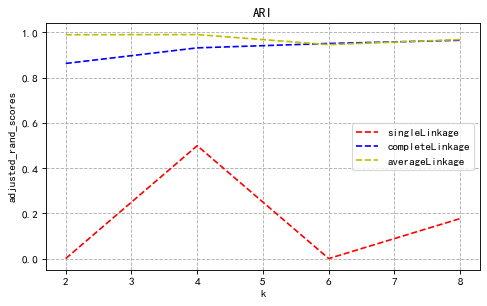

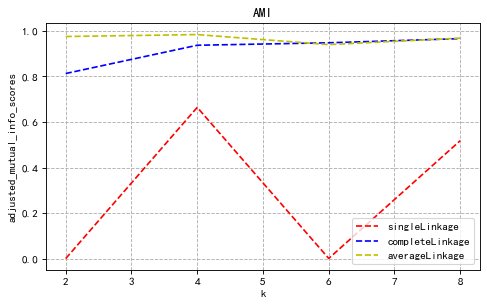

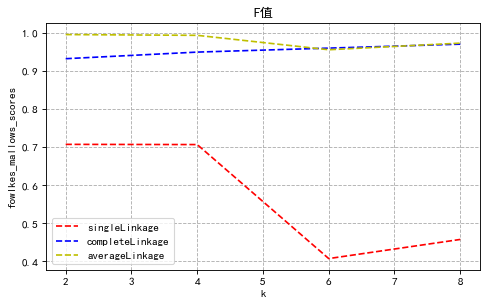

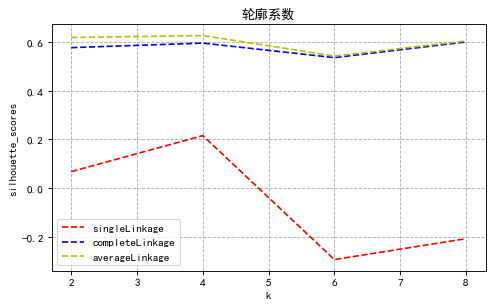

In [17]:
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
plt.figure(figsize=(7,4),dpi=80)
for i in range(len(METHOD_APPLY)):
    plt.plot([2,4,6,8],adjusted_rand_scores[i],color=colors[i],linestyle='--',label=title[i])
plt.legend()
plt.grid(linestyle="--")
plt.xlabel("k")
plt.ylabel("adjusted_rand_scores")
plt.title('ARI')
plt.show()

plt.figure(figsize=(7,4),dpi=80)
for i in range(len(METHOD_APPLY)):
    plt.plot([2,4,6,8],adjusted_mutual_info_scores[i],color=colors[i],linestyle='--',label=title[i])
plt.legend()
plt.grid(linestyle="--")
plt.xlabel("k")
plt.ylabel("adjusted_mutual_info_scores")
plt.title('AMI')
plt.show()

plt.figure(figsize=(7,4),dpi=80)
for i in range(len(METHOD_APPLY)):
    plt.plot([2,4,6,8],fowlkes_mallows_scores[i],color=colors[i],linestyle='--',label=title[i])
plt.legend()
plt.grid(linestyle="--")
plt.xlabel("k")
plt.ylabel("fowlkes_mallows_scores")
plt.title('F值')
plt.show()

plt.figure(figsize=(7,4),dpi=80)
for i in range(len(METHOD_APPLY)):
    plt.plot([2,4,6,8],silhouette_scores[i],color=colors[i],linestyle='--',label=title[i])
plt.legend()
plt.grid(linestyle="--")
plt.xlabel("k")
plt.ylabel("silhouette_scores")
plt.title('轮廓系数')
plt.show()

通过我们输出聚类前后的样本分布图像以及评价指标，并将评价指标绘制成可视化图像后分析可知：
- single_linkage算法层次对于我们的聚类样本而言聚类效果最差，而且波动性相对最强
- 通过调整兰德系数、调整互信息分数以及F值可以看出average_linkage和complete_linkage算法层次聚类对于聚类准确性上来说更稳定，并且准确性更高
- 随着聚类个数越多，通过轮廓系数可以看出average_linkage算法层次聚类相对而言，对于类间分离程度和类内紧致性表现最好
